In [1]:
import logging

from hcve_lib.utils import notebook_init

notebook_init()

import pandas
from matplotlib import pyplot

from deps.data import load_metadata
from deps.logger import logger
from hcve_lib.analysis import missing_values
from hcve_lib.data import format_value, find_item
from hcve_lib.visualisation import display_number, b, p
from hcve_lib.visualisation import histogram
from hcve_lib.visualisation import make_subplots
from deps.common import get_data_cached

In [21]:
from deps.data import load_raw_data, load_data

metadata = load_metadata()
data = load_data(metadata)

raw_data = load_raw_data()
raw_data_subset = raw_data.loc[data.index]
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'

[18:22:43] Raw data
	n cohorts=21
	n individuals=52,585

[18:22:43] Dropping HULL LIFE LAB cohort
	n cohorts removed=1: hull_lifelab
	n individuals removed=3,239

	n cohorts=20
	n individuals=49,346

[18:22:43] Baseline visit kept
 	n individuals removed=5,529

 	n individuals=43,817

[18:22:43] HF cohorts removed
	n cohorts removed=3: hfgr, timechf, leitzaran
	n individuals removed=1,073

	n cohorts=17
	n individuals=42,744

[18:22:43] No outcome cohorts removed
	n cohorts removed=5: biomarcoeurs, dyda, epath, iblomaved, stophf
	n individuals removed=3,077

	n cohorts=12
	n individuals=39,667

[18:22:43] Missing HF data cohorts removed
	n cohorts removed=6: adelhyde, gecoh, r2c2, reve(1-2), stanislas, styrianvitd
	n individuals removed=6,209

	n cohorts=6
	n individuals=33,458

[18:22:43] Missing blood pressure measurements
 	n individuals removed=395

 	n individuals=33,063

[18:22:43] Providing missing PP for 3075individuals

[18:22:43] HF individuals at baseline removed
 	n individ

In [3]:
data_without_healthabc, metadata, X_without_healthabc, y_without_healthabc = get_data_cached(['HEALTHABC'])

________________________________________________________________________________
[Memory] Calling deps.common.get_data...
get_data(['HEALTHABC'])
_________________________________________________________get_data - 4.8s, 0.1min


/home/sitnarf/projects/homage-fl/deps/common.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['STUDY'] = data_selected['STUDY'].cat.remove_unused_categories()


In [4]:
for study, tte in y_without_healthabc['data'].groupby(data_without_healthabc['STUDY'])['tte']:
    print(study, tte.median()/365)

ASCOT 5.6
FLEMENGHO 6.712328767123288
HVC 1.0712328767123287
PREDICTOR 3.9095890410958902
PROSPER 3.26027397260274


In [5]:
for study, tte in y_without_healthabc['data'].groupby(data_without_healthabc['STUDY'])['tte']:
    print(study, tte[y_without_healthabc['data']['label'] == 0].median()/365)

ASCOT 5.619178082191781
FLEMENGHO 6.778082191780822
HVC 1.1082191780821917
PREDICTOR 3.947945205479452
PROSPER 3.263013698630137


In [6]:
from deps.common import get_data
logger.setLevel(logging.INFO)
data, metadata, X, y = get_data()

[18:21:59] Raw data
	n cohorts=21
	n individuals=52,585

[18:21:59] Dropping HULL LIFE LAB cohort
	n cohorts removed=1: hull_lifelab
	n individuals removed=3,239

	n cohorts=20
	n individuals=49,346

[18:21:59] Baseline visit kept
 	n individuals removed=5,529

 	n individuals=43,817

[18:21:59] HF cohorts removed
	n cohorts removed=3: hfgr, timechf, leitzaran
	n individuals removed=1,073

	n cohorts=17
	n individuals=42,744

[18:21:59] No outcome cohorts removed
	n cohorts removed=5: biomarcoeurs, dyda, epath, iblomaved, stophf
	n individuals removed=3,077

	n cohorts=12
	n individuals=39,667

[18:21:59] Missing HF data cohorts removed
	n cohorts removed=6: adelhyde, gecoh, r2c2, reve(1-2), stanislas, styrianvitd
	n individuals removed=6,209

	n cohorts=6
	n individuals=33,458

[18:21:59] Missing blood pressure measurements
 	n individuals removed=395

 	n individuals=33,063

[18:21:59] Providing missing PP for 3075individuals

[18:21:59] HF individuals at baseline removed
 	n individ

In [7]:
for study, tte in y['data'].groupby(data['STUDY'])['tte']:
    print(study, tte.median()/365)
print()
print('Total', y['data']['tte'].median()/365,
      '+-', (y['data']['tte']/365).std())

ASCOT 5.6
FLEMENGHO 6.712328767123288
HEALTHABC 12.032876712328767
HVC 1.0712328767123287
PREDICTOR 3.9095890410958902
PROSPER 3.26027397260274

Total 5.3561643835616435 +- 2.457081632125407


In [8]:
y['data']['label'].value_counts()

0.0    30252
1.0     1130
Name: label, dtype: int64

In [9]:
print(y["data"]['tte'].quantile(0.025)/365)
print(y["data"]['tte'].median()/365)
print(y["data"]['tte'].quantile(0.975)/365)

1.0233561643835618
5.3561643835616435
13.158904109589042


In [10]:
print(X["AGE"].quantile(0.025))
print(X["AGE"].mean())
print(X["AGE"].quantile(0.975))


44.46557152635181
66.37412727011841
80.26683959960943


In [11]:
X["AGE"].std()

9.883935222656936

In [12]:
for group_name, group in X.groupby(data['STUDY']):
    print(group_name)
    print(len(group))

ASCOT
19255
FLEMENGHO
1261
HEALTHABC
2935
HVC
489
PREDICTOR
1638
PROSPER
5804


In [13]:
data_without_healthabc

,IDNR,STUDY_NUM,STUDY,VISIT,SEX,AGE,BW,BH,BMI,SMK,DRK,DIABETES,HCV,HCAD,HPAD,HAF,HCEREBROV,TRT_AH,TRT_ACE,TRT_CCB,TRT_DIUR,TRT_BB,TRT_ARB,TRT_LIP,SBP,DBP,HR,PP,SOK,QRS,CI,GLU,CHOL,LDL,HDL,TG,CREA,FCV,FUFCV,NFHF,FUNFHF,FNFHF,FUFNFHF
IDNR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000001,2000001,2,ASCOT,BASELINE,1.0,67.572895,100.3,173.0,33.512647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,143.5,101.0,57.5,42.5,18.5,90.0,1440.0,5.60000,2.900000,1.185000,1.400000,0.70000,NaN,0.0,2199.0,0.0,2199.0,0.0,2199.0
2000002,2000002,2,ASCOT,BASELINE,1.0,50.828200,83.1,173.0,27.765712,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,141.5,99.0,83.0,42.5,19.5,86.0,1763.0,6.90000,6.000000,3.215000,1.300000,3.30000,124.000,0.0,2306.0,0.0,2306.0,0.0,2306.0
2000003,2000003,2,ASCOT,BASELINE,1.0,74.203970,74.0,167.0,26.533759,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,184.5,96.5,58.5,88.0,27.0,90.0,1845.0,5.80000,6.500000,4.195000,1.900000,0.90000,94.000,0.0,2305.0,0.0,2305.0,0.0,2305.0
2000004,2000004,2,ASCOT,BASELINE,1.0,67.857632,87.0,188.0,24.615211,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,180.5,101.5,59.5,79.0,20.5,90.0,1215.0,NaN,5.000000,NaN,0.900000,NaN,102.000,1.0,1477.0,0.0,1477.0,0.0,1477.0
2000005,2000005,2,ASCOT,BASELINE,2.0,73.240246,59.0,162.0,22.481329,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,169.0,89.0,83.0,80.0,26.0,80.0,1840.0,14.20000,5.700000,3.305000,1.000000,3.10000,100.000,0.0,2213.0,0.0,2213.0,0.0,2213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624467,624467,6,FLEMENGHO,BASELINE,2.0,79.104600,77.3,164.5,28.565885,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,155.2,78.4,55.0,76.8,8.7,92.0,1840.0,5.21794,5.741330,3.594797,1.732744,0.91449,81.328,0.0,3507.0,0.0,2656.0,NaN,NaN
624471,624471,6,FLEMENGHO,BASELINE,1.0,55.416210,83.7,183.5,24.857264,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.4,83.2,64.0,43.2,8.8,84.0,1218.0,3.99672,4.629270,2.844803,1.137921,1.42254,104.312,0.0,1545.0,0.0,621.0,NaN,NaN
624474,624474,6,FLEMENGHO,BASELINE,2.0,49.772727,90.1,162.5,34.120710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.0,86.4,63.0,51.6,17.2,80.0,1080.0,3.99672,4.060310,2.405152,1.008612,1.38867,68.068,0.0,1540.0,0.0,421.0,NaN,NaN


**Features**

In [14]:
len(X)

31382

**Missing features**

In [15]:
remove_missing = ['DEPRESSION', 'BNP', 'LPA', 'FIBRINOGEN', 'HOMOCYST', 'EGFR']

from hcve_lib.formatting import format_percents
from hcve_lib.data import format_identifier

missing = [
    (column, data[column].isna().sum()/len(data[column]))
    for column in data.columns
]
missing = sorted(missing, key=lambda item: item[1], reverse=True)


for column, missing_percent in missing:
    print(f'{format_percents(missing_percent):6} [{column}]: {format_identifier(column, metadata)}')


38.6%  [FNFHF]: Fatal or non-fatal heart failure
38.6%  [FUFNFHF]: FUFNFHF
36.5%  [CI]: Cornell index
36.0%  [SOK]: Sokolow-Lyon index
28.3%  [HAF]: History of atrial fibrillation
24.5%  [QRS]: QRS duration
23.7%  [TRT_LIP]: Intake of lipid-lowering medication
19.7%  [CREA]: Serum creatinine
11.7%  [TRT_ACE]: Intake of angiotensin converting enzyme inhibitors
11.7%  [TRT_CCB]: Intake of calcium channel blockers
11.7%  [TRT_BB]: Intake of beta-blokcers
11.7%  [TRT_ARB]: Intake of angiotensin II receptor blockers
11.6%  [TRT_DIUR]: Intake of diuretics
7.2%   [LDL]: LDL-cholesterol
6.1%   [GLU]: Blood glucose
5.9%   [TG]: Triglycerides
1.6%   [DRK]: Alcohol intake
0.4%   [HR]: Heart rate
0.3%   [BMI]: Body-mass index
0.2%   [BW]: Body weight
0.2%   [HPAD]: History of peripheral artery disease
0.2%   [SMK]: Smoking status
0.2%   [BH]: Body height
0.2%   [HCV]: History of cardiovascular disease
0.2%   [HDL]: HDL-cholesterol
0.2%   [CHOL]: Total cholesterol
0.1%   [HCAD]: History of coronary

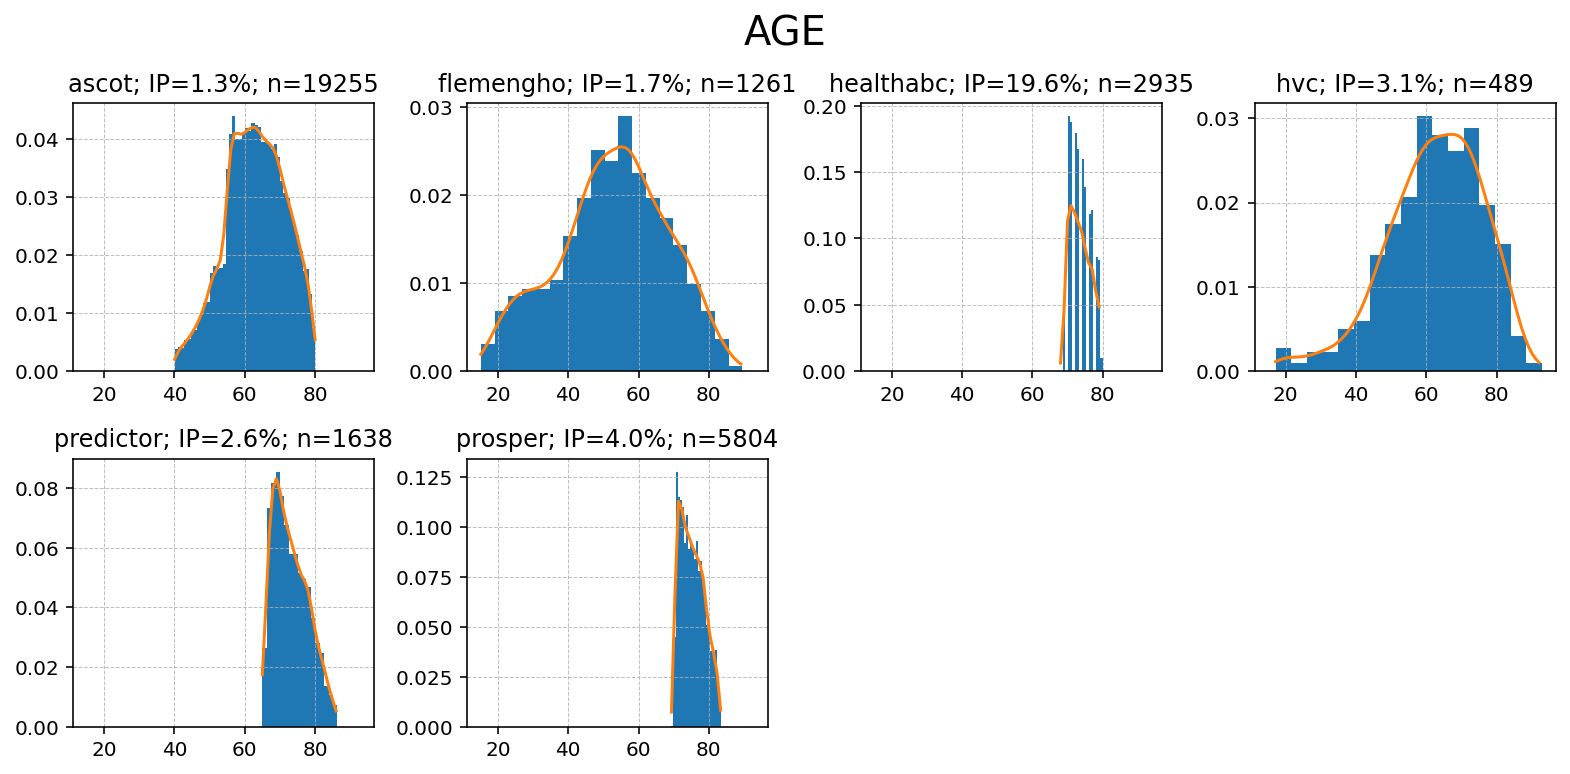

In [16]:
from hcve_lib.visualisation import savefig

cohorts = data.groupby('STUDY_NUM')
axes, fig = make_subplots(len(cohorts), columns=4, sharex=True, width=11)
fig.suptitle('AGE', fontsize=20, y=0.97)
for ax, (study_num, cohort) in zip(axes, cohorts):
    ax.set_title(f'{format_value(study_num, find_item("STUDY_NUM", metadata))}; IP={format_percents(len(cohort["NFHF"][cohort["NFHF"] == 1]) / len(cohort))}; n={len(cohort)}')
    histogram(cohort['AGE'], ax=ax)
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.set_xlabel(None)
    ax.plot()
pyplot.tight_layout()
savefig('./output/data_distribution.svg')
pyplot.show()

In [17]:

b('Input rows')
display_number(len(data))

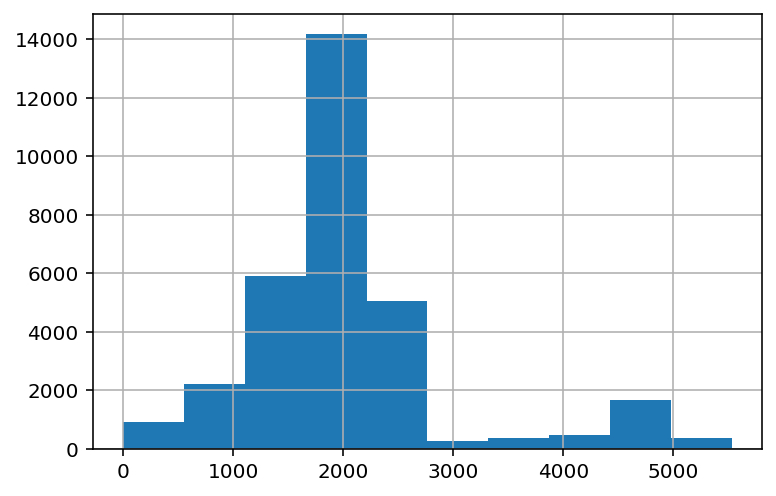

In [18]:
b('Cardiovascular death FU histogram')

data['FUFCV'].hist()
pyplot.show()


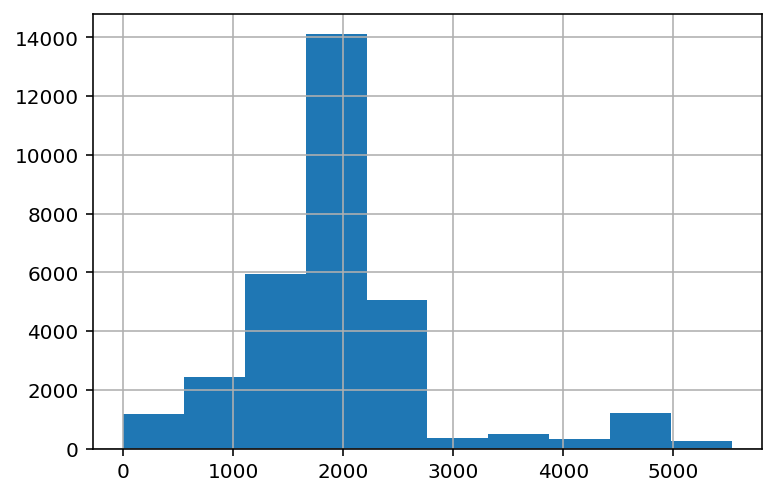

In [19]:
b('Non-fatal heart failure FU histogram')
data['FUNFHF'].hist();


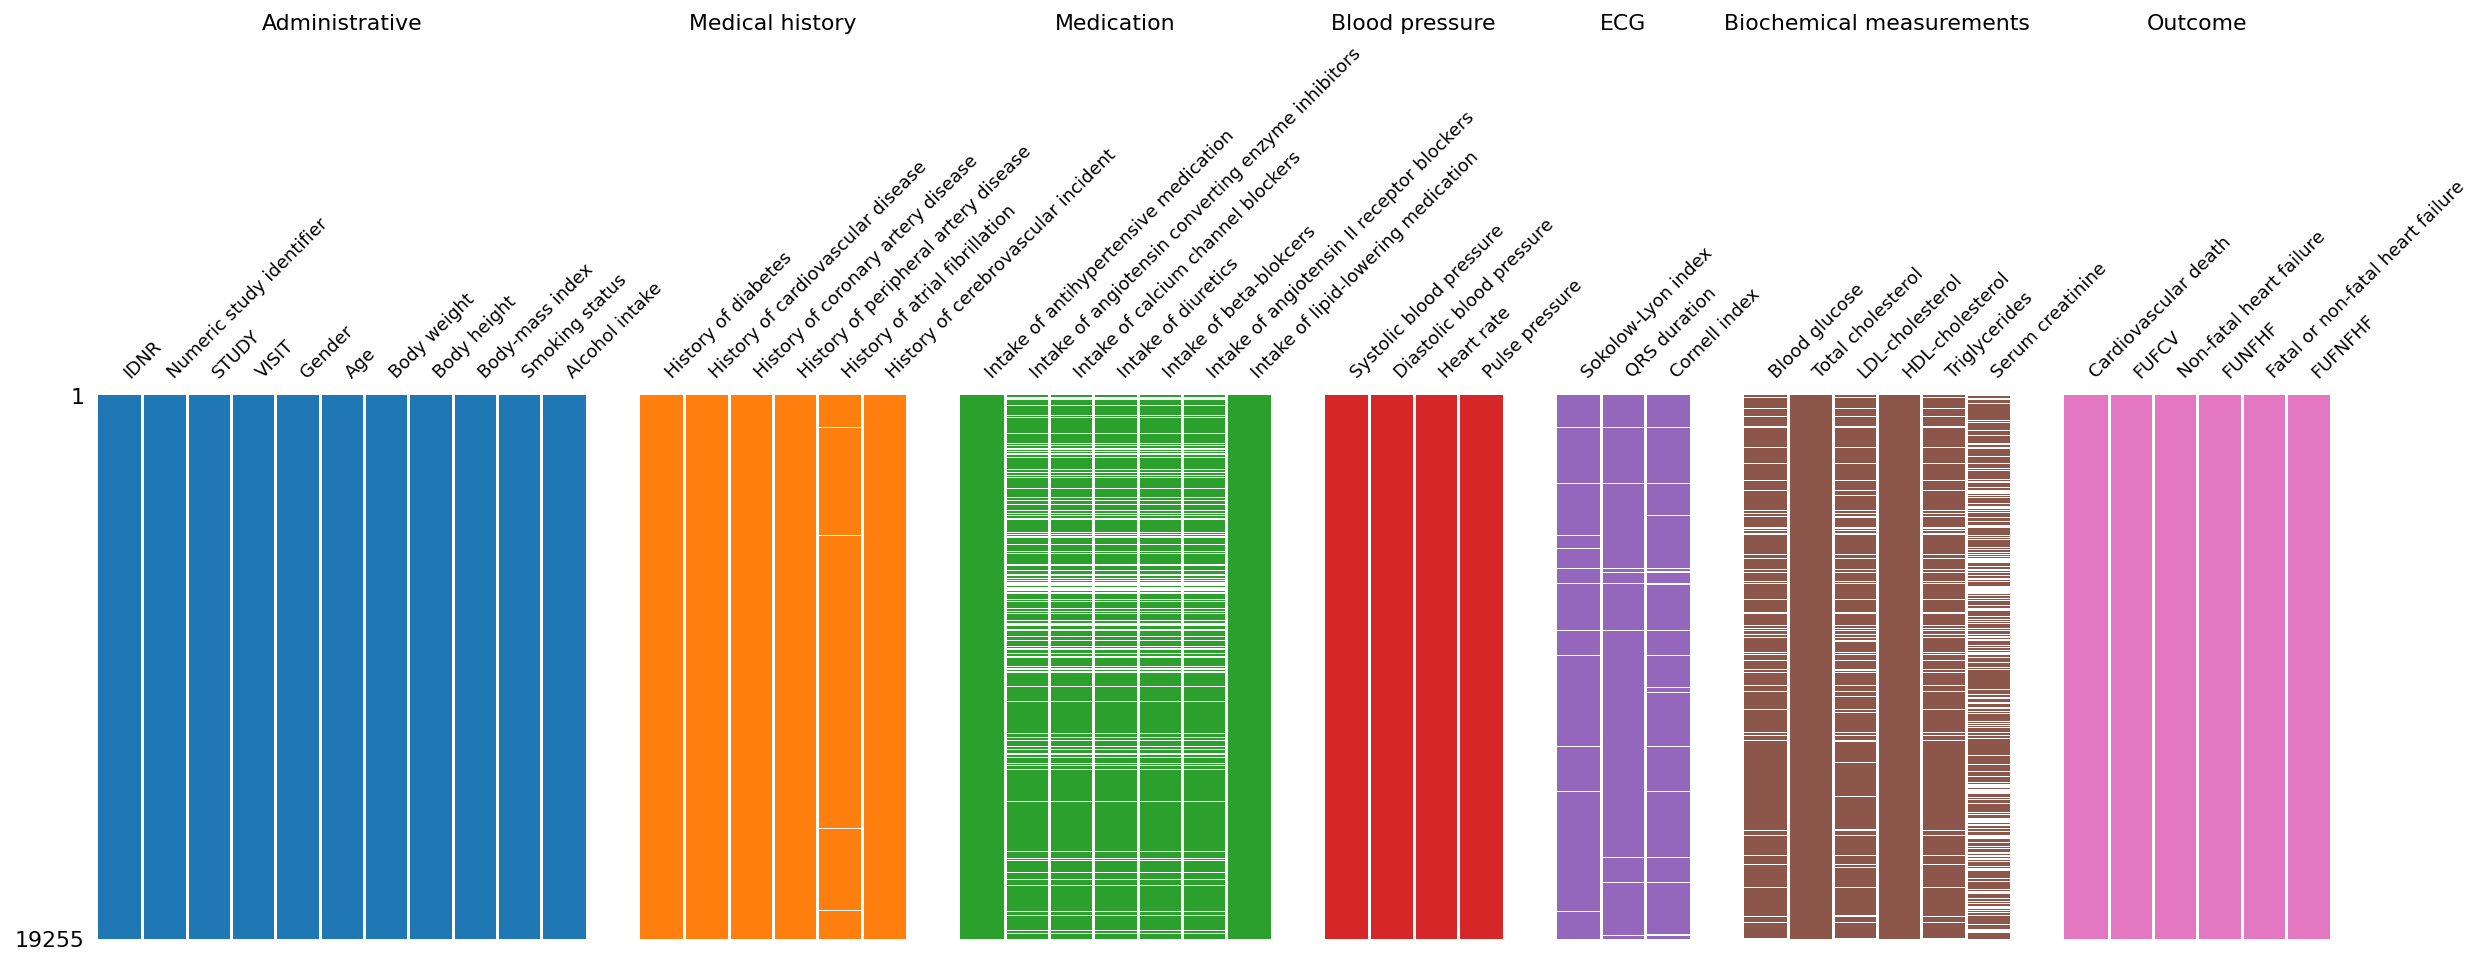

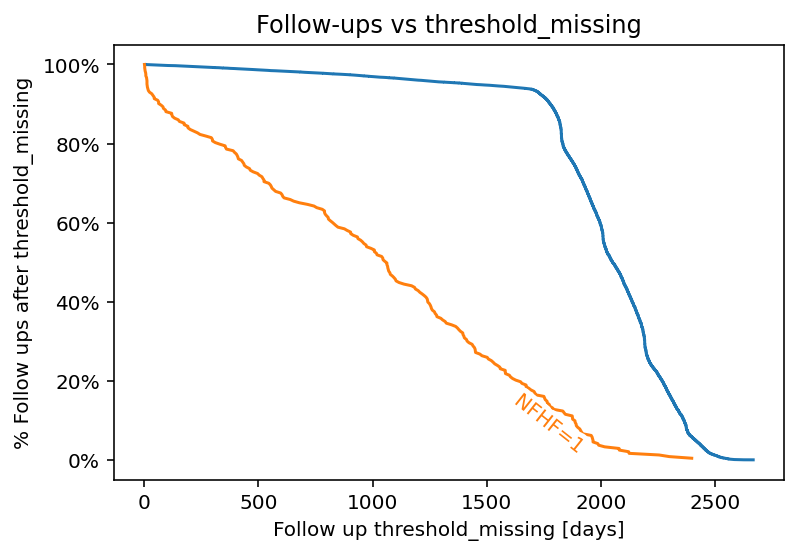

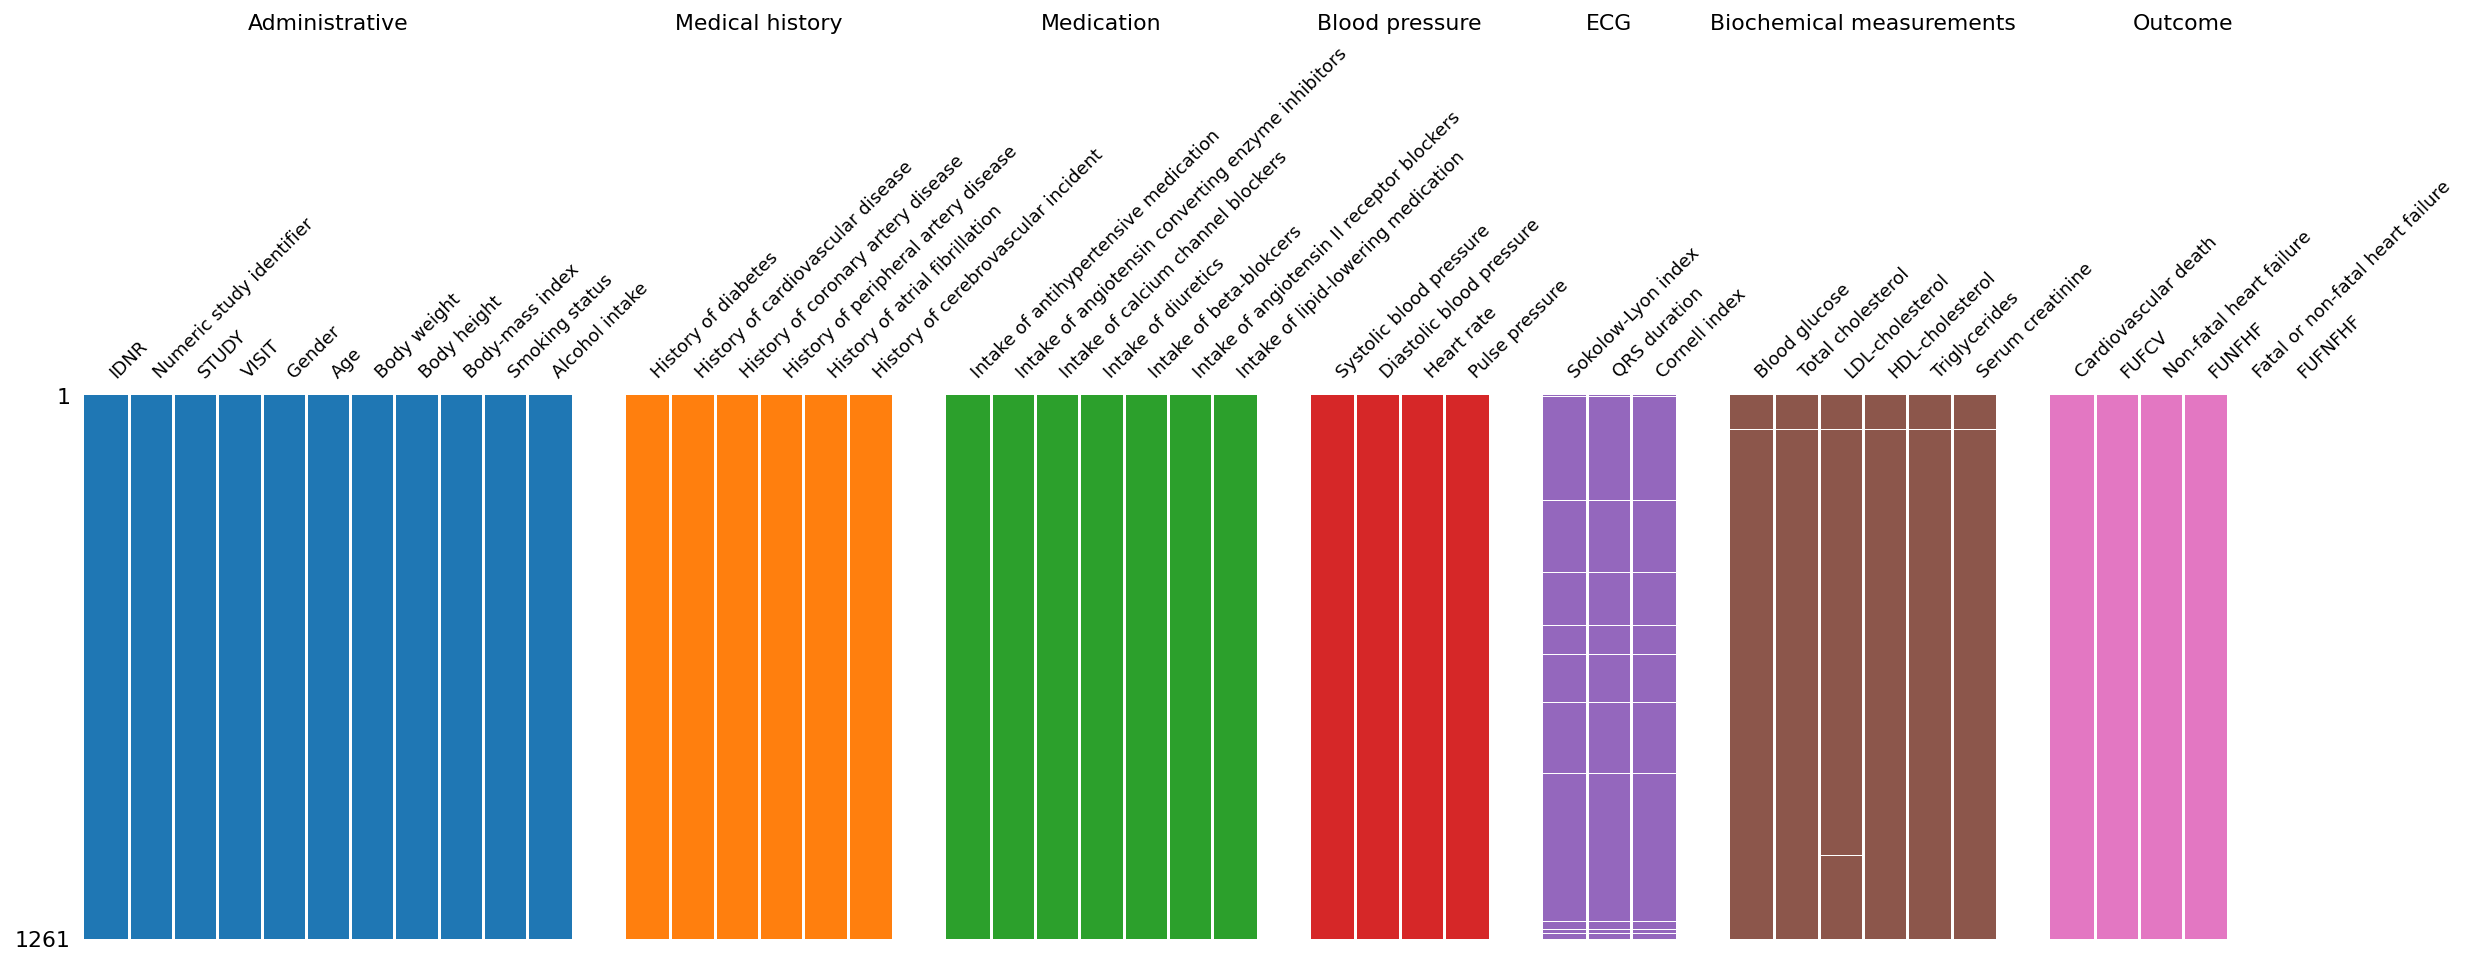

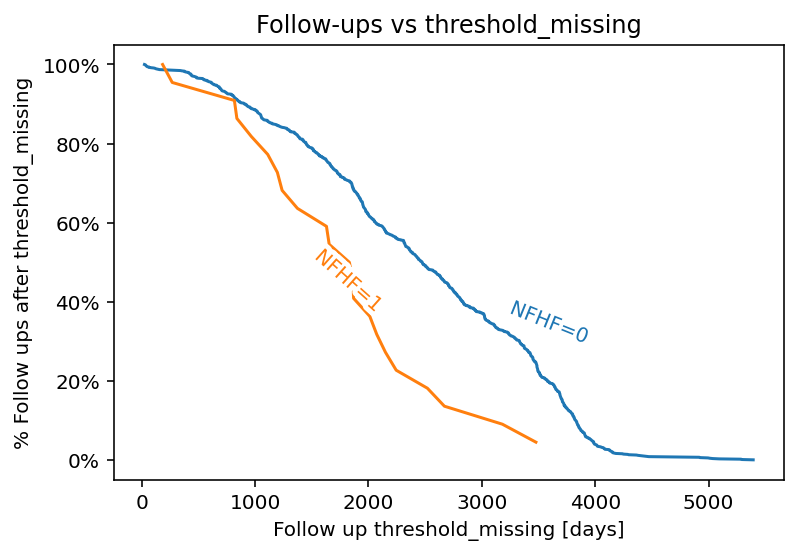

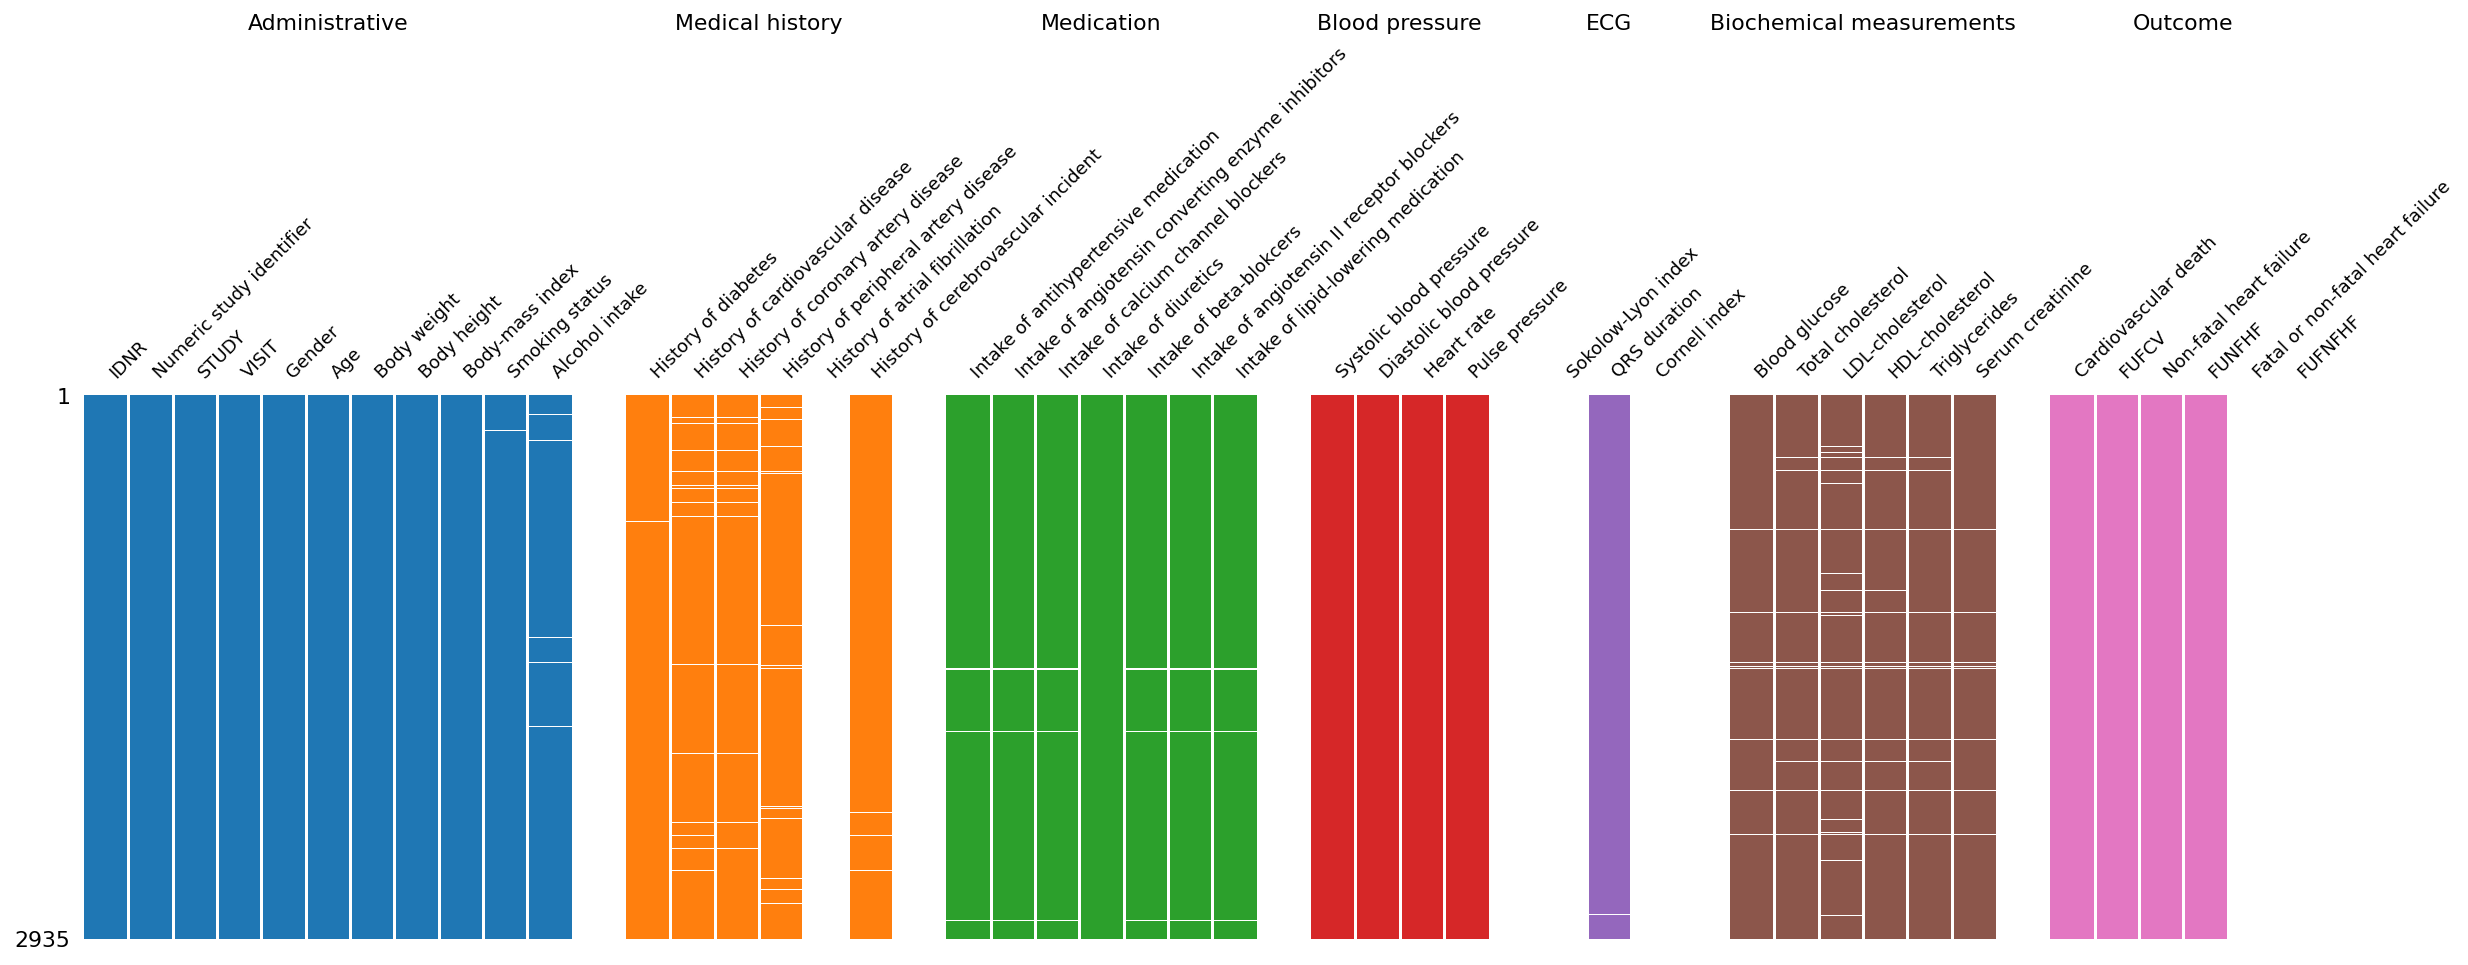

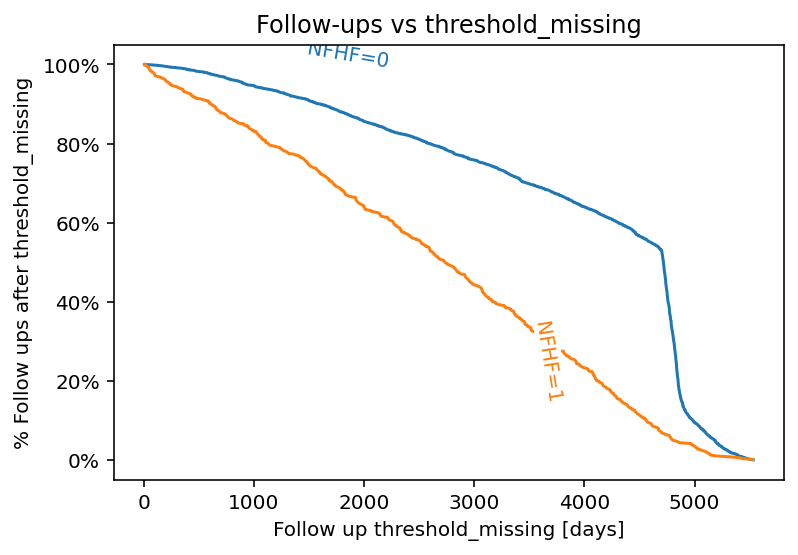

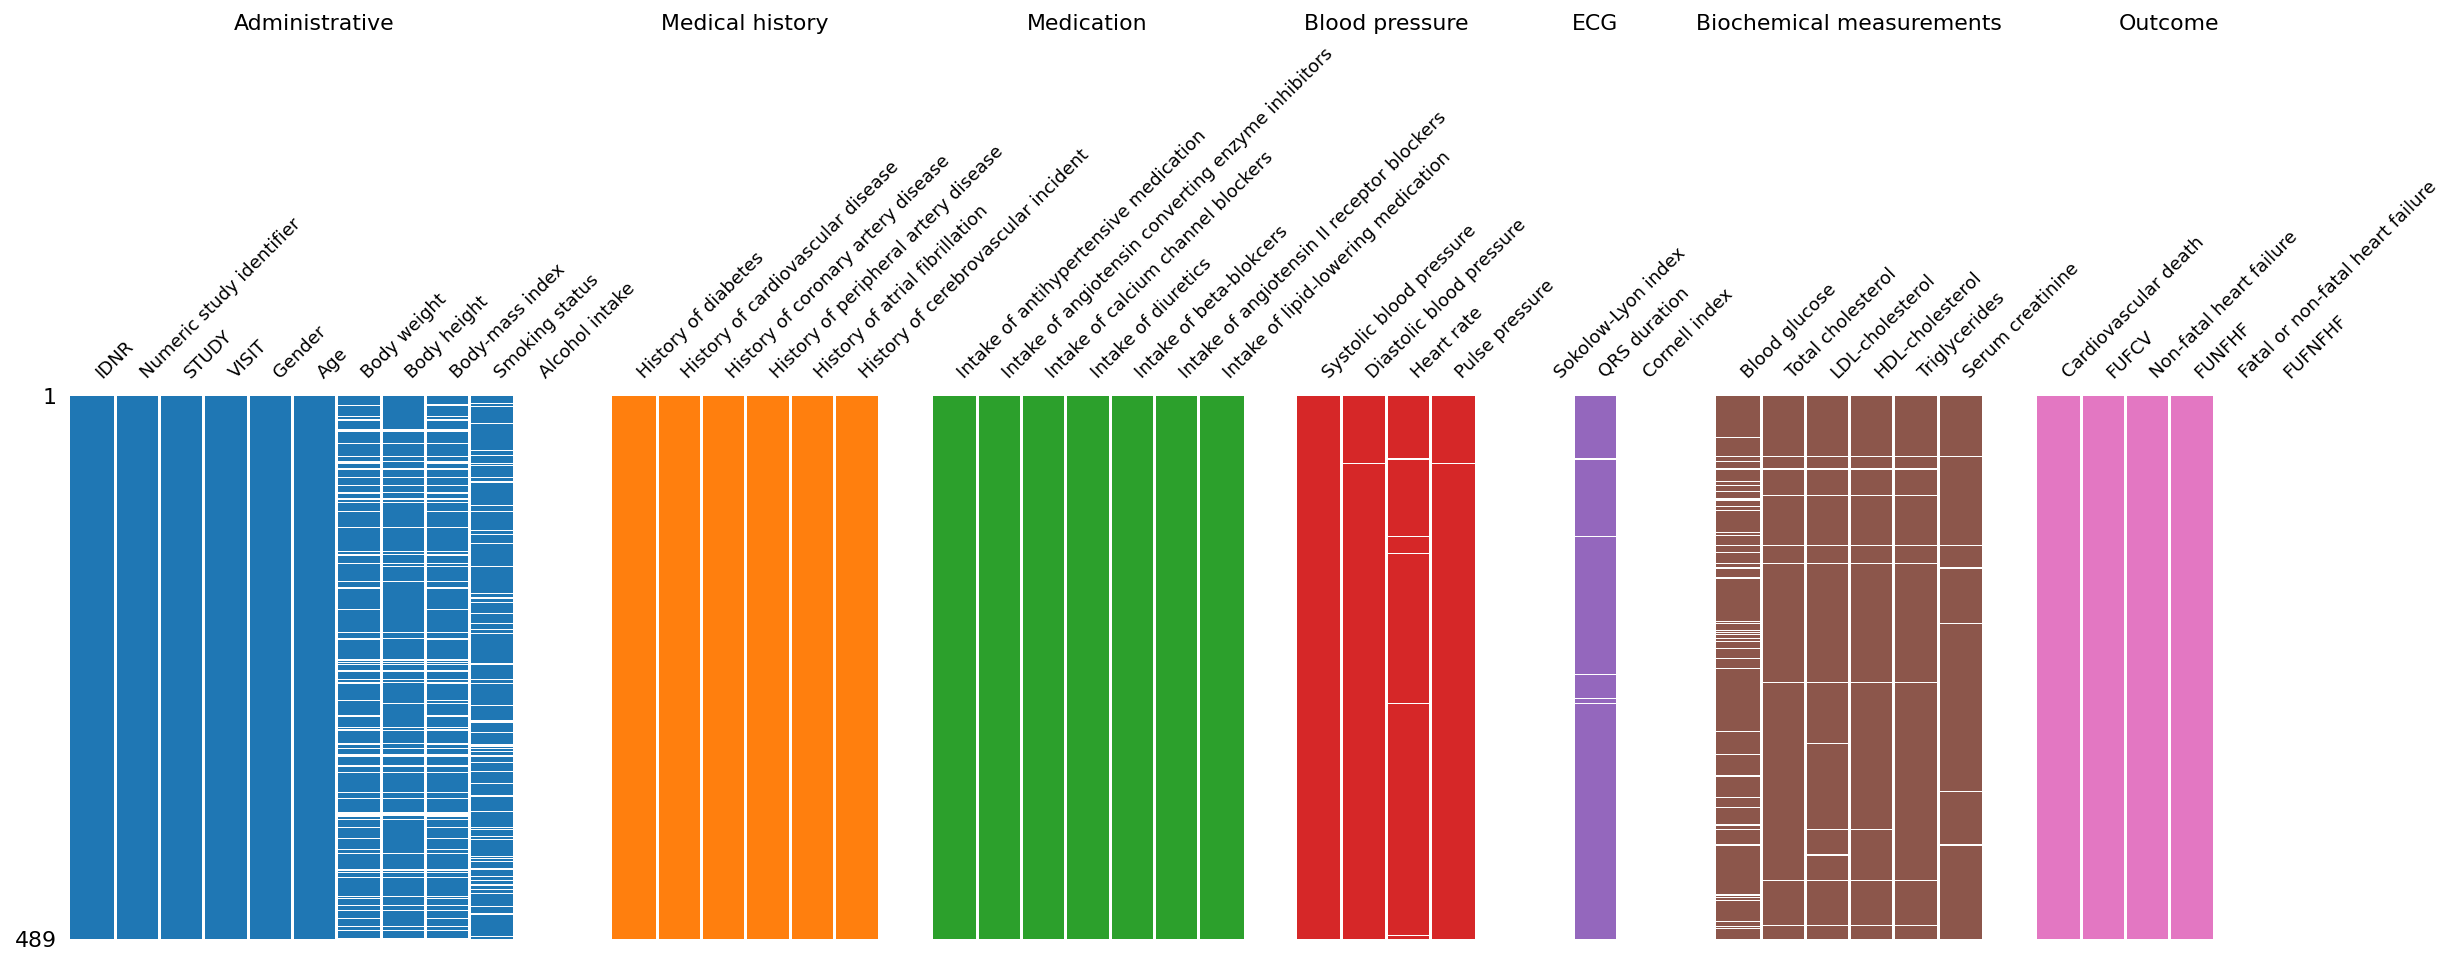

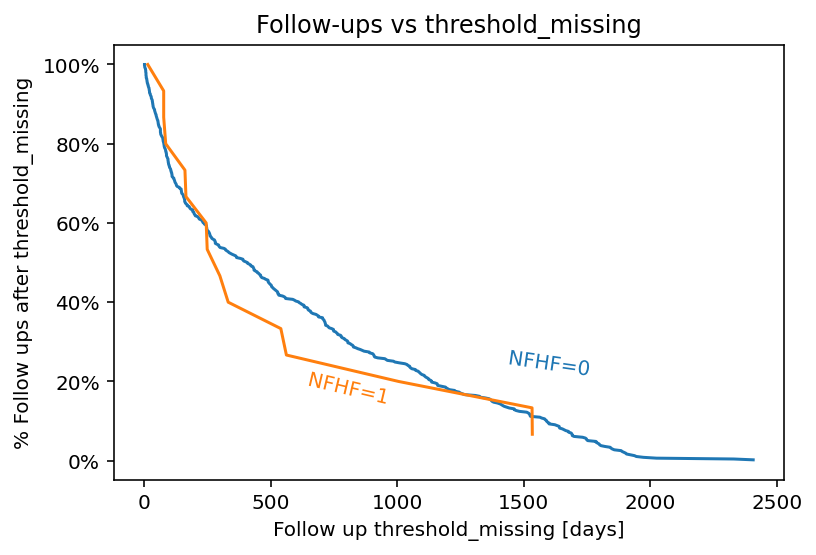

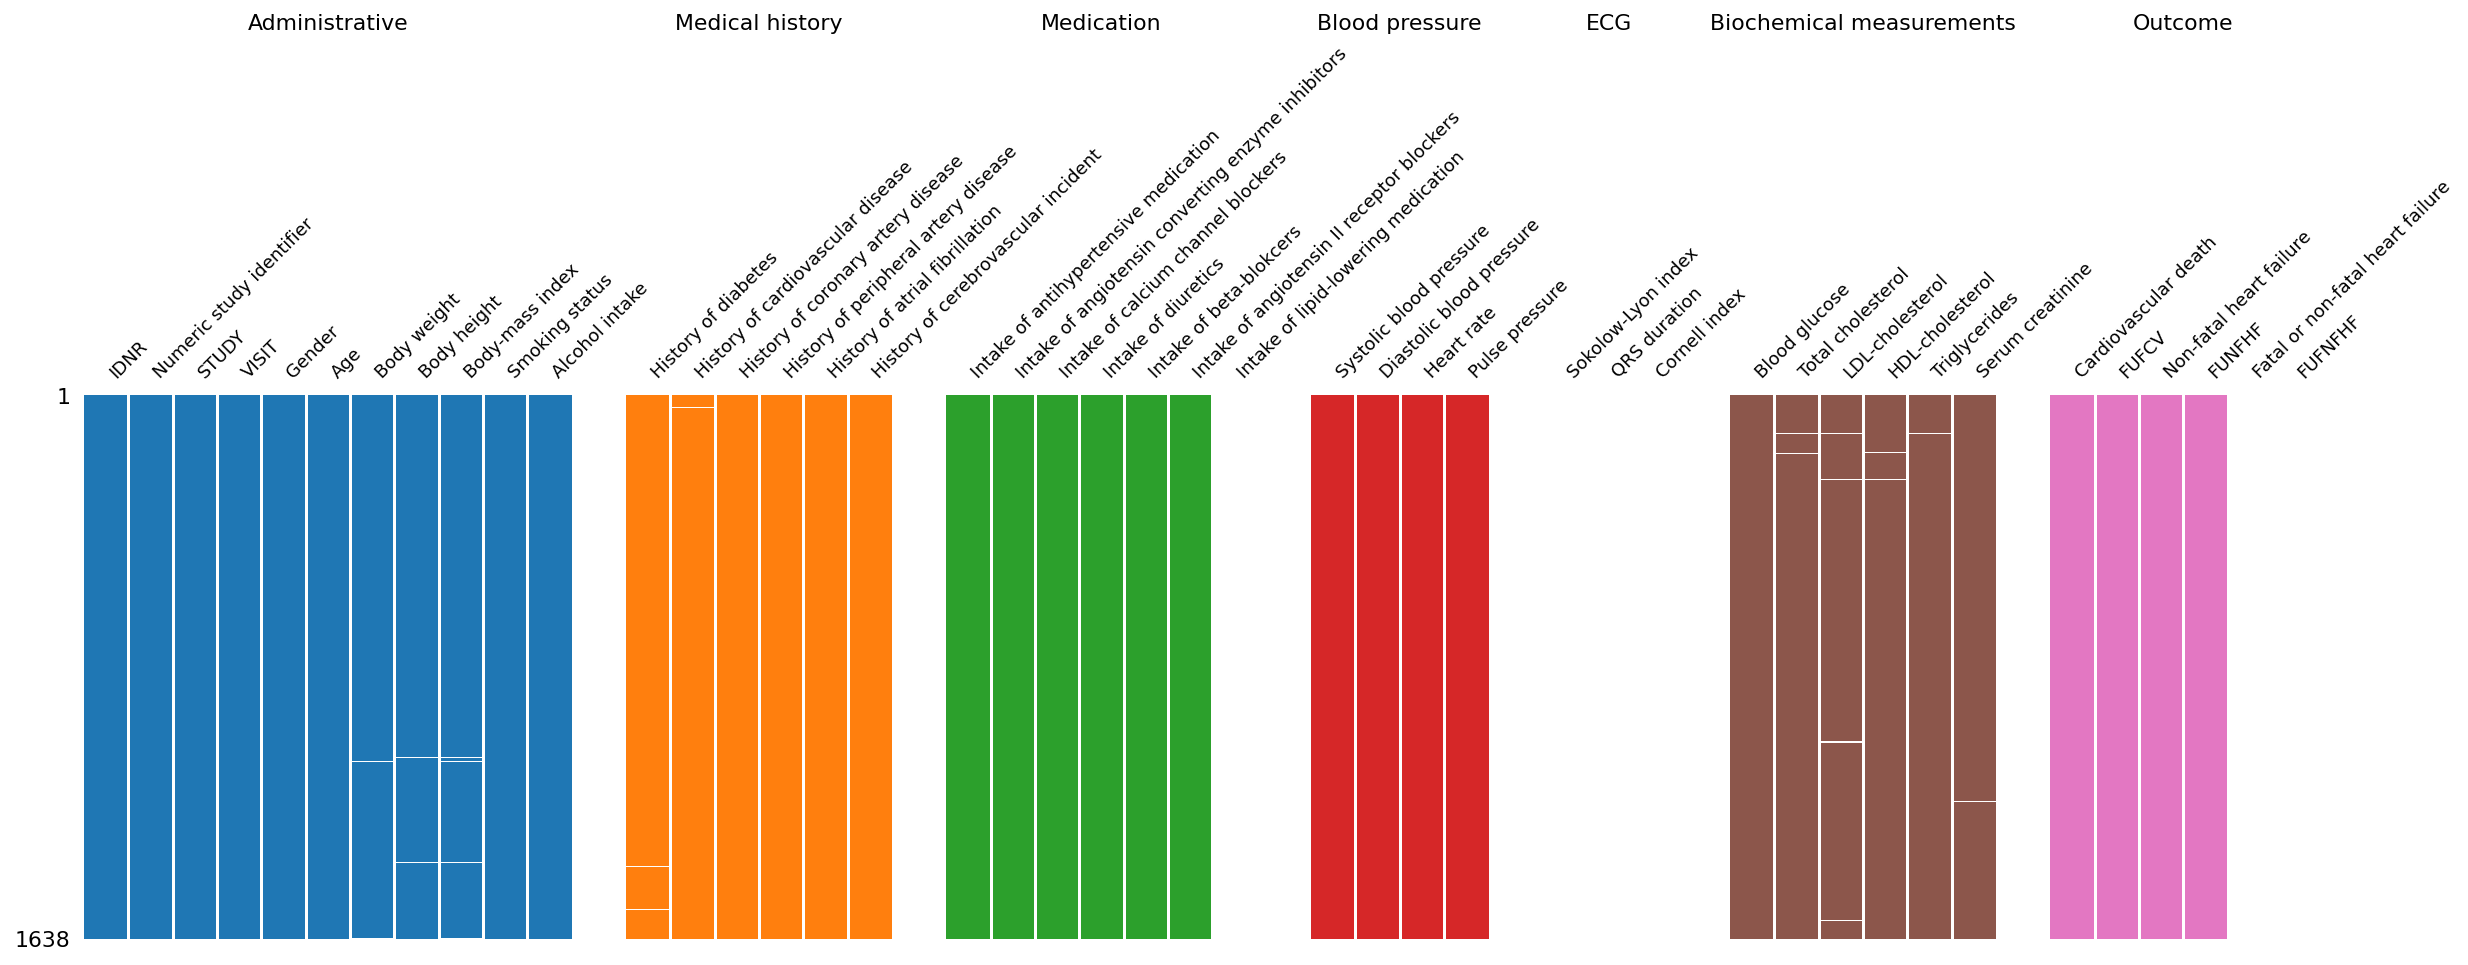

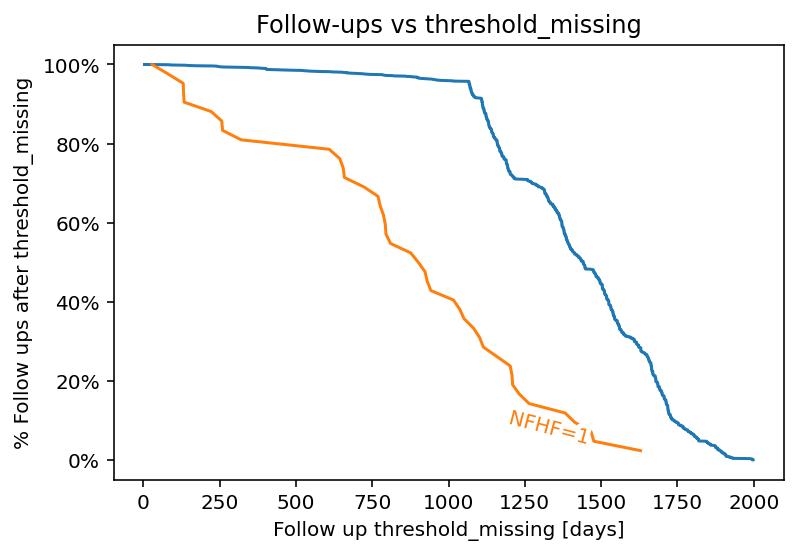

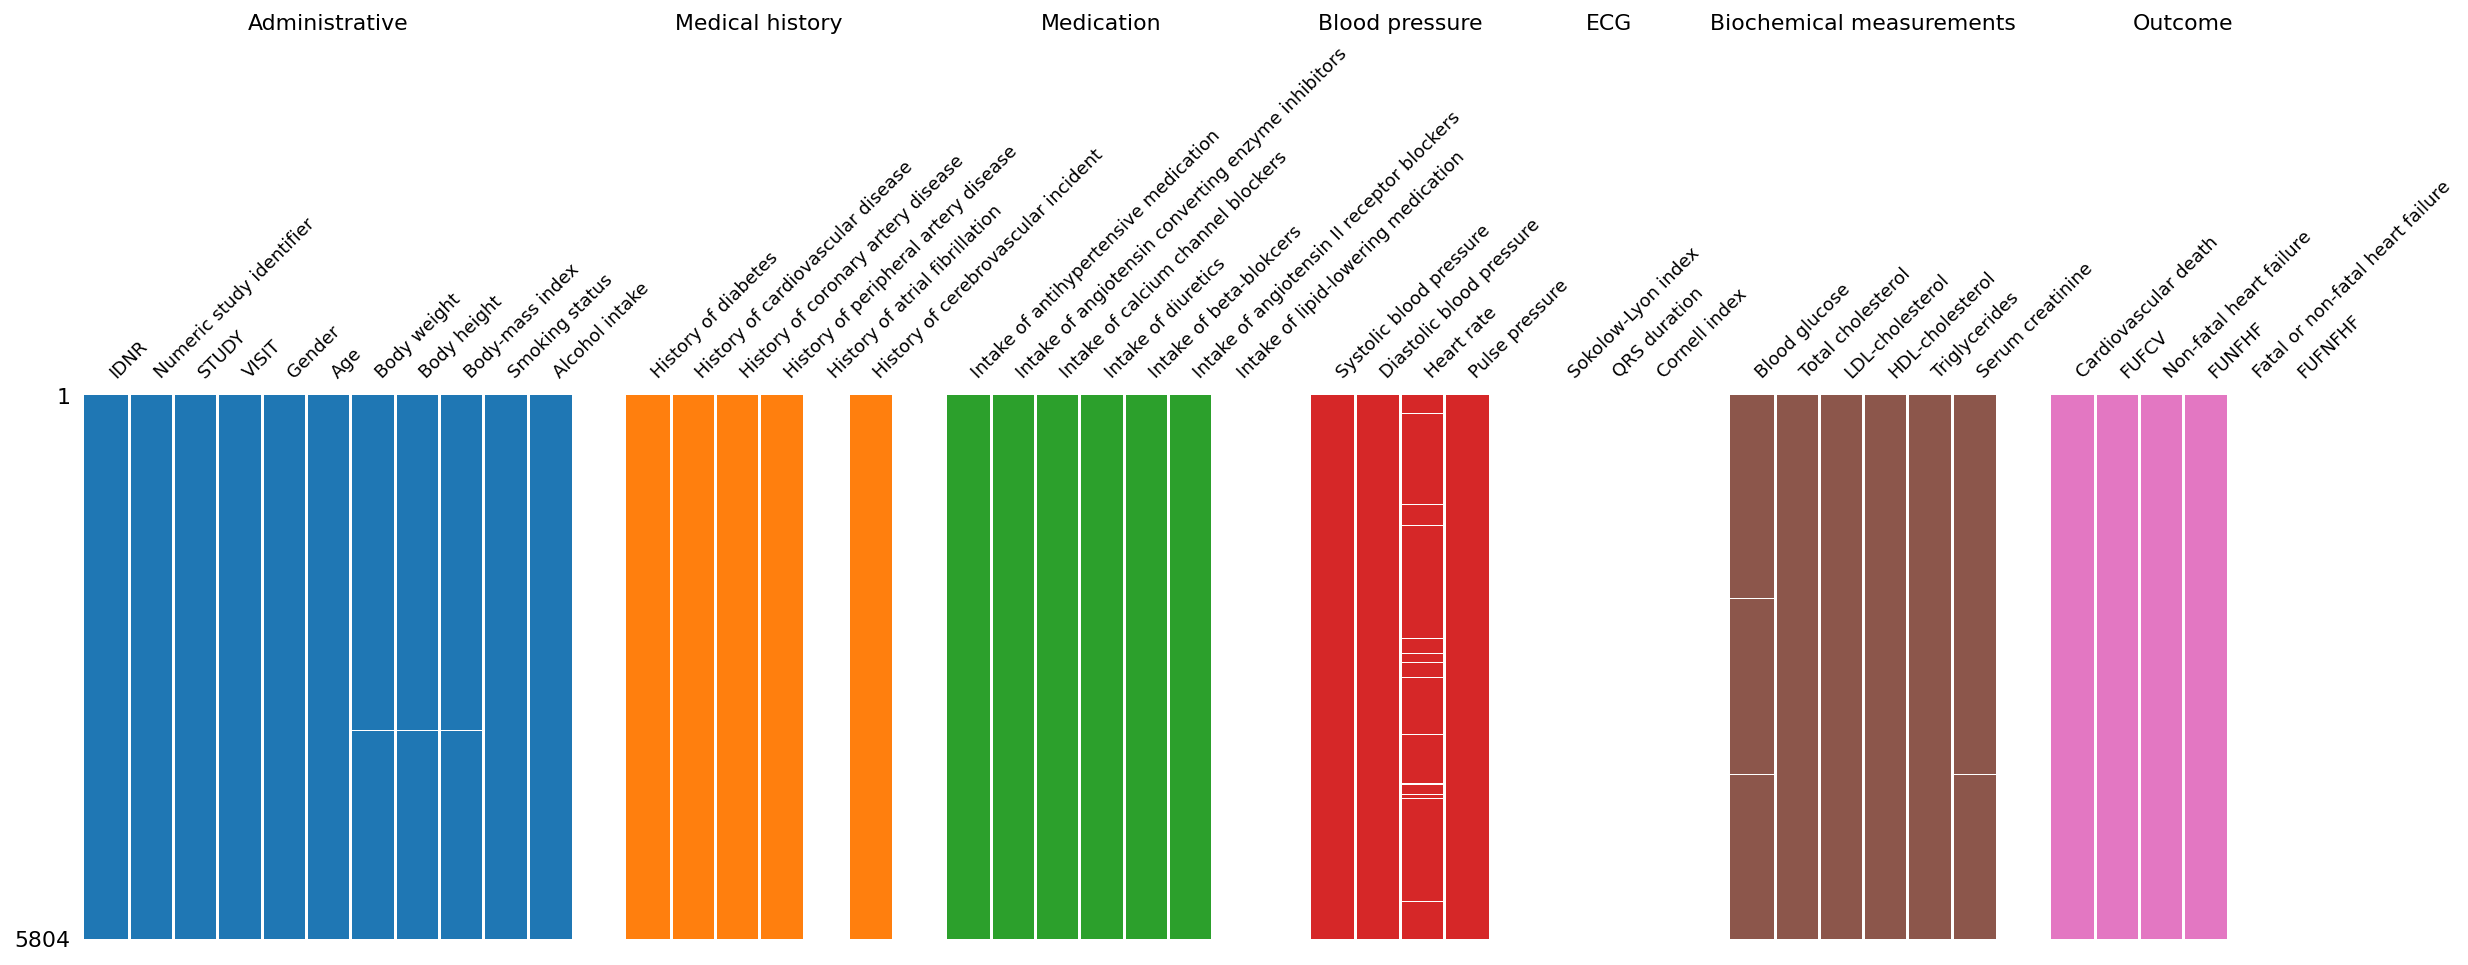

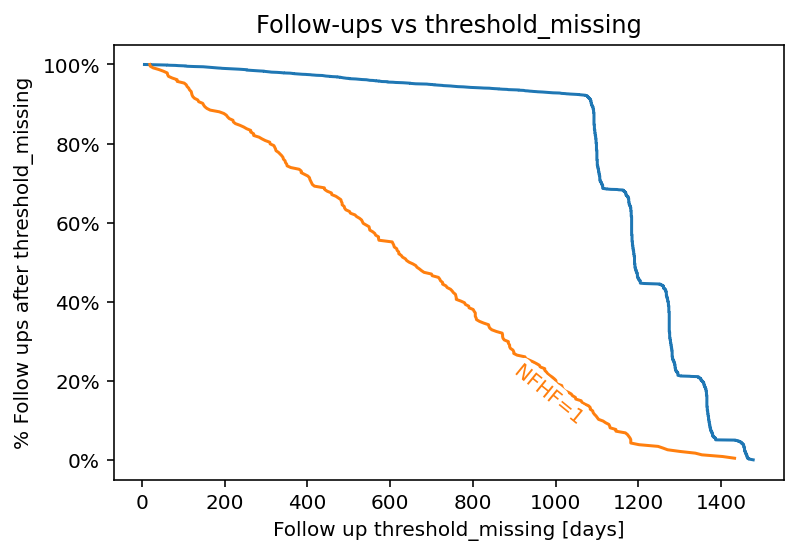

In [20]:
from hcve_lib.visualisation import h2
from labellines import labelLines
from hcve_lib.analysis import follow_ups_vs_threshold

for study_num, cohort in data.groupby('STUDY_NUM'):
    h2(f'{format_value(study_num, find_item("STUDY_NUM", metadata))} (n={len(cohort)})')
    missing_values(
        cohort,
        metadata,
    )
    pyplot.show()

    follow_ups_vs_threshold(cohort[cohort['NFHF'] == 0]['FUNFHF'], label='NFHF=0')
    follow_ups_vs_threshold(cohort[cohort['NFHF'] == 1]['FUNFHF'], label='NFHF=1')
    labelLines(pyplot.gca().get_lines(), zorder=2.5, yoffsets=[0.15, -0.05])
    pyplot.show()
    p(f'NFHF: IP={format_percents(len(cohort["NFHF"][cohort["NFHF"] == 1]) / len(cohort))}; n={len(cohort["NFHF"][cohort["NFHF"] == 1])}')
    p(f'FCV: IP={format_percents(len(cohort["FCV"][cohort["FCV"] == 1]) / len(cohort))}; n={len(cohort["FCV"][cohort["FCV"] == 1])}')
    print()

